<a href="https://colab.research.google.com/github/kamila0801/WineQuality/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Data visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# **Load data**

In [2]:
# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
# column_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
                # 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
wine_df = pd.read_csv(url, sep=';', header=0, quoting=1)  # Assuming the first row is the header
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Displaying info
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
# Displaying info
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# saving a copy to preserve descriptive values
training_df_pre_transformation = wine_df

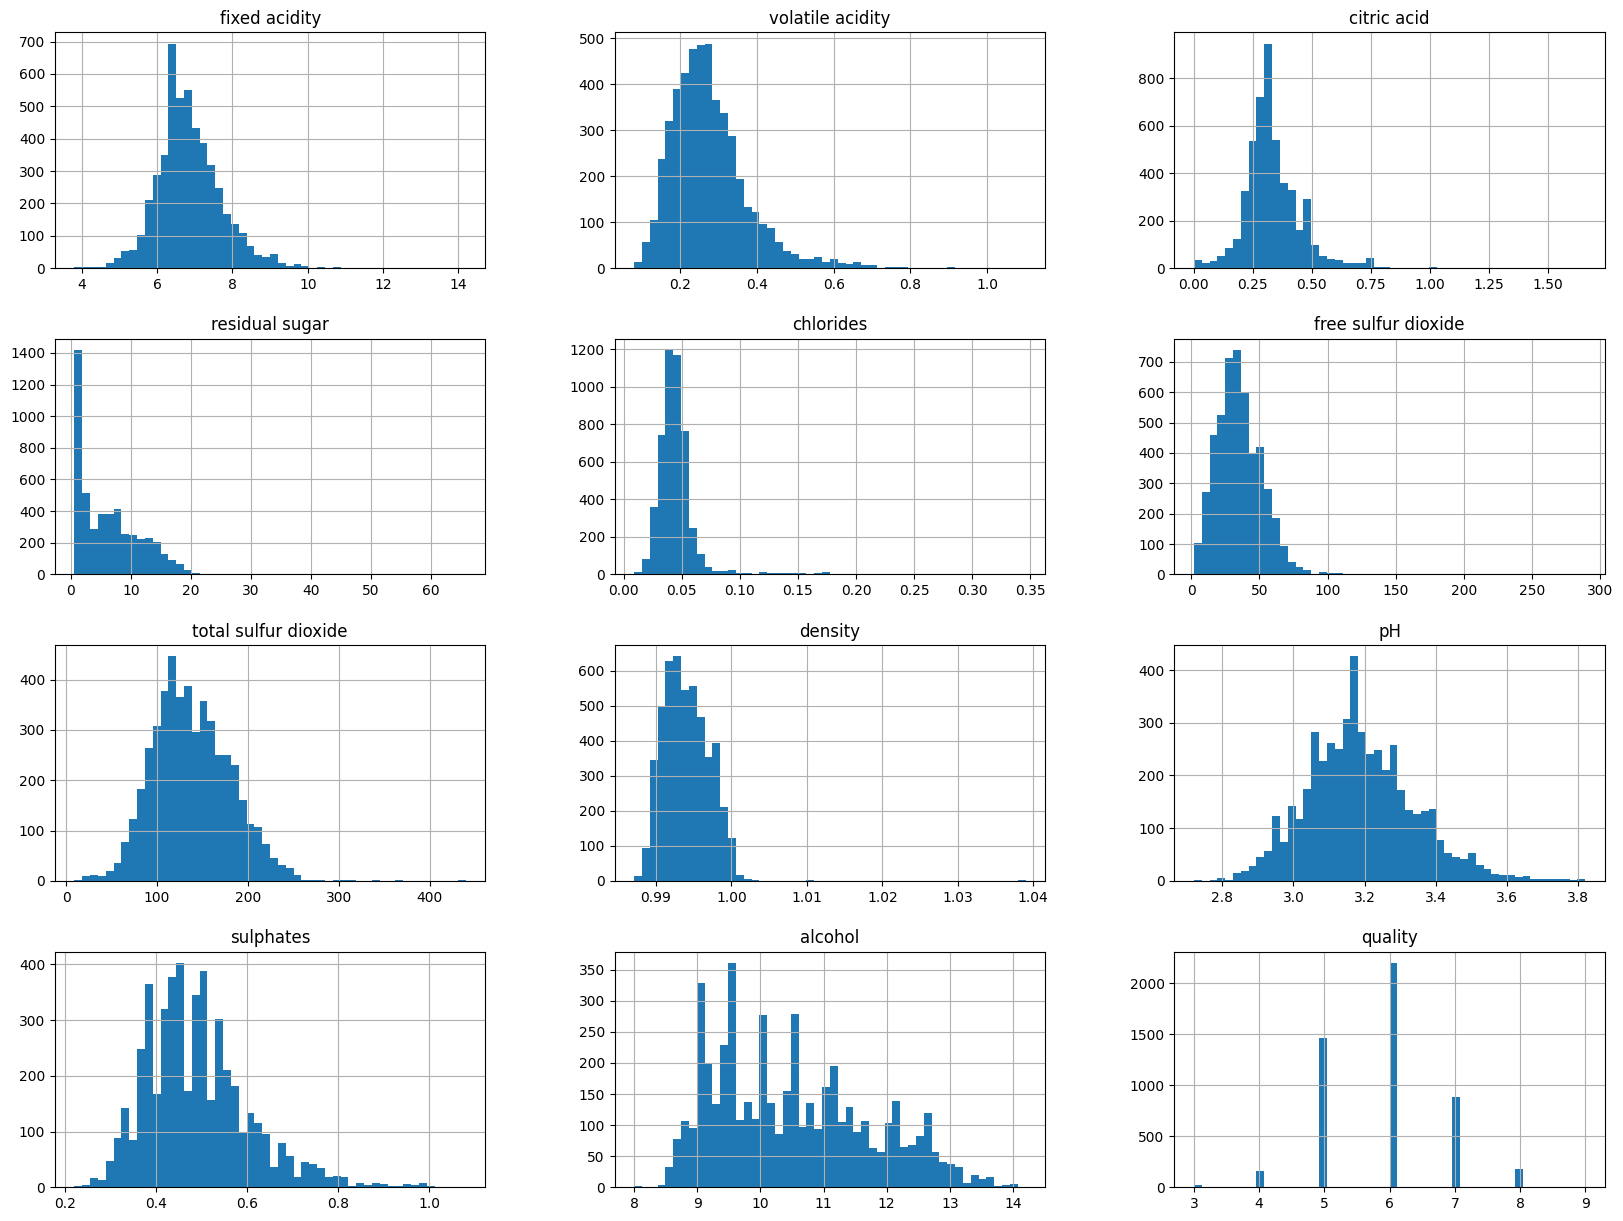

In [6]:
# Plot a histogram of each numerical feature
import matplotlib.pyplot as plt
wine_df.hist(bins=50, figsize=(20,15))
plt.show()

# **Data analyzys**



In [7]:
# Check for duplicates
wine_df = wine_df.drop_duplicates()

print(f"Number of rows post removing duplicates {wine_df.shape[0]}")

Number of rows post removing duplicates 3961


**Outlier detection**

In [8]:
from sklearn.ensemble import IsolationForest

# Select relevant features for outlier detection
features_for_outlier_detection = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Create a subset DataFrame with selected features
subset_for_outlier_detection = wine_df[features_for_outlier_detection]

# Assign column names to the subset
subset_for_outlier_detection.columns = features_for_outlier_detection

# Initialize Isolation Forest model for outlier detection
outlier_model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter based on your dataset

# Fit the model to the data
outlier_model.fit(subset_for_outlier_detection)

# Predict outliers (1 for inliers, -1 for outliers)
outlier_predictions = outlier_model.predict(subset_for_outlier_detection)

# Add the outlier predictions to the original DataFrame
wine_df['is_outlier'] = outlier_predictions

# Print the count of outliers
outlier_count = (outlier_predictions == -1).sum()
print("Number of Outliers:", outlier_count)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of Outliers: 198


<ipython-input-8-f49ab3c778a9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['is_outlier'] = outlier_predictions


**Correlation**

In [9]:
# How much does each feature correlate with the wine quality
# The correlation coefficient ranges from -1 (100% negative correlation) to 1 (100% positive correlation)
corr_matrix = wine_df.corr(numeric_only=True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.462869
pH                      0.123829
is_outlier              0.110908
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64

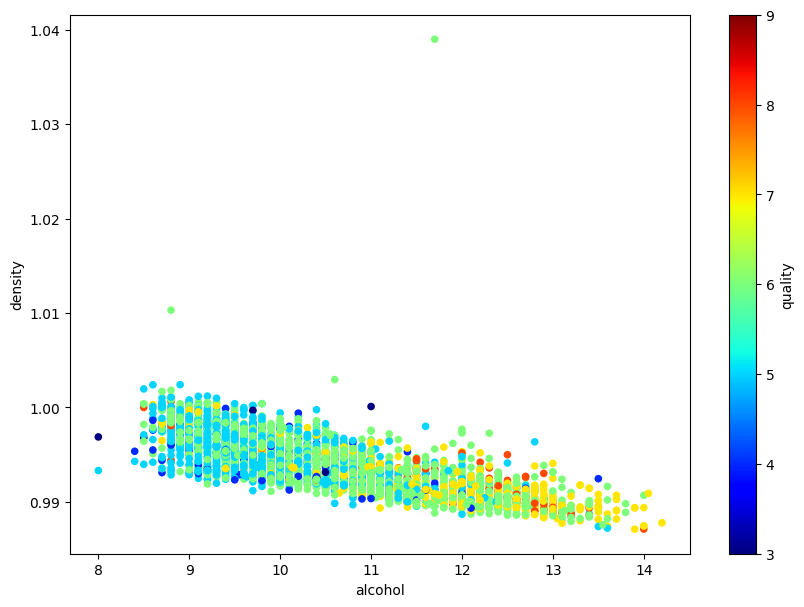

In [10]:
# Visualization
wine_df.plot(kind="scatter", x="alcohol", y="density",
    c="quality", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10,7))
plt.show()

Above matrix shows that quality of wine has the highest correlation with alcohol and density - the higher the percentage, the better quality. Also, the higher the density, the lower the quality.
Matrix also showed that free sulfur dioxide and citric acid have almost no correlation (it's less than 0.01). That is why I decide to remove those features from the data frame.

In [11]:
columns_to_remove = ['free sulfur dioxide', 'citric acid']

# Drop the specified columns
wine_df = wine_df.drop(columns=columns_to_remove)

# Display the DataFrame after removing columns
wine_df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_outlier
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,7.0,0.045,136.0,0.9949,3.18,0.47,9.6,6,1


# **Data preparation**

**Feature scaling**

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
wine_scaled = scaler.fit_transform(wine_df)
wine_scaled

array([[0.30769231, 0.18627451, 0.30828221, ..., 0.12903226, 0.5       ,
        1.        ],
       [0.24038462, 0.21568627, 0.01533742, ..., 0.24193548, 0.5       ,
        1.        ],
       [0.41346154, 0.19607843, 0.09662577, ..., 0.33870968, 0.5       ,
        1.        ],
       ...,
       [0.25961538, 0.15686275, 0.00920245, ..., 0.22580645, 0.5       ,
        1.        ],
       [0.16346154, 0.20588235, 0.00766871, ..., 0.77419355, 0.66666667,
        1.        ],
       [0.21153846, 0.12745098, 0.00306748, ..., 0.61290323, 0.5       ,
        1.        ]])

**Split dataset**

**Stratified sampling**

Stratified sampling ensures that the test set is representative of the whole dataset. The dataset is first divided into subgroups called strata (e.g. a stratum could represent an income group). Then the right number of instances for both training and test sets are picked from each stratum. Stratified sampling reduces sampling bias.

In [13]:
from sklearn.model_selection import train_test_split

# Feature matrix (X) and target variable (y)
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# Map classes to start from 0
class_mapping = {c: i for i, c in enumerate(sorted(y.unique()))}
y_mapped = y.map(class_mapping)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

# Train

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(min_samples_leaf=2, random_state=42)

# Evaluate

In [16]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Test Set MSE (Random Forest):", mse)

# Evaluate Explained Variance
explained_var = explained_variance_score(y_test, y_pred)
print("Explained Variance (Random Forest):", explained_var)

# Evaluate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score (Random Forest):", r2)

Test Set MSE (Random Forest): 0.5623899546247962
Explained Variance (Random Forest): 0.3150557638591446
R-squared (R2) Score (Random Forest): 0.3142647389830292
